# Read SSP file

 finished the run we talked about yesterday. This
is the run where I vary the couplings lambda12 and
lambda13, i.e. MINPAR[14] and MINPAR[15]. I called
it Exa11.spc, it is in the dropbox.

This contains
<code>
1   6 TeV      # vRinput
12  50 TeV    # M1INPUT
13  (2.7-3.1) TeV # M23INPUT
14  [10^-3,1]      # lamT1INPUT
15  [10^-3,1]      # lamT2INPUT
</code>

Aagain scanned logarithmically. The mass of the DM is in a
very small window, to make the dependence of the DD on
lambda more visible.

I also made two runs which are variations of this
one. In Exa11a I put MINPAR[14]==0 and vary only
lamT2, while in Exa11b I put MINPAR[15]==0 and
vary lamT1.


## Initialization

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from matplotlib.colors import LogNorm

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
from hep import *
import time
from __future__ import print_function
from __future__ import division
from google_drive_tools import *
drive={'lrdm.xlsx':'0BxoOXsn2EUNIYkhzcFM3U2JFYk0'}

## minimal inizialization

In [6]:
lha=open('/tmp/LHA_minimal','w')
lha.write('Block MODSEL      #\n 1 1   #  1/0: High/low scale input')
lha.close()

## Load model with minimal file

In [7]:
a=hep(MODEL='LRDM',spc_input_file='/tmp/LHA_minimal')

Fix input file

In [8]:
%%bash
cat SPheno.ssp.LRDM_original | perl -p -e  's/(^\s*201\s+.*#$)/\1 DDn/'  > kk
cat kk | perl -p -e  's/(^\s*203\s+.*#$)/\1 DDp/'  > kkk
mv kkk SPheno.ssp.LRDM
#diff SPheno.ssp.LRDM kk

## Possible design

`a.scan_ssp(ssp_file,n=1)`

get the n spc file from an SSP output

`a.ssp_ntotal -> number of spc files`

<code>for n in range(1,a.ssp_ntotal+1):
    spc_lha=a.scan_ssp(ssp_file,n)
    #work on spc_lhae
</code>    

## Fast implementation

In [8]:
ssp_file='SPheno.ssp.%s' %a.MODEL
f=open(ssp_file)
spctxt=f.readlines()    

i=0
record=False
start=time.time()
spc=pd.DataFrame()    
for l in spctxt:
    if not record:
        ff=open('SPheno.spc.%s' %a.MODEL,'w')
            
    k=re.match('^\s*endofparameterfile\s*$',l.lower())
    if k:
        record=False #Finalize record
        ff.close()
        #=======All the important code must be here=======
        i=i+1
        if i%100==0: print('.', end='')
        slha=a.readSSP()
        kk=a.branchings(a.LHA_out.decays,min_pdg=25)
        outs=pd.Series({})
        for key in ['MINPAR','MASS','CHMIX','SCALARMIX','AMIX']:
            outs=outs.append( block_to_series(a.LHA_out_with_comments.blocks[key]) )

        outs=outs.append(block_to_series(a.LHA_out_with_comments.blocks['DARKMATTER'],simplify_key=False))            
        outs=outs.append(pd.Series(a.LHA_out.blocks['DMCHANNELS'].entries))
        #outs=outs.append(a.Br_names)
        #outs=outs.append(pd.Series(a.LHA_out_with_comments.blocks['FWCOEF'].entries))
        spc=spc.append(outs,ignore_index=True) 
        #=================================
    else:
        ff.write(l)
        record=True
        
print(time.time()-start)

...................688.706357002


## FIx SI sigma

In [ ]:
#cat SPheno.ssp.LRDM | perl -p -e 's/^(\s+201\s+[0-9\.eE\-\+]+\s+#)$/\1 DDn/' > kk 

In [13]:
SAVE=False
if SAVE:
    spc.to_excel('lrdm.xlsx',index=False)
else:
    lrdm_xlsx=download_file_from_google_drive(drive['lrdm.xlsx'])
    spc=pd.read_excel(lrdm_xlsx)

In [15]:
spc=spc.fillna(0)

## Results

In [95]:
a.LHA_out_with_comments.blocks['MASS'].entries

_dict([(25, '8.65425169E+01  # hh_1'),
       (35, '1.48681290E+02  # hh_2'),
       (335, '3.63765065E+02  # hh_3'),
       (36, '3.58040393E+02  # Ah_3'),
       (37, '3.03137695E+02  # Hpm_3'),
       (9000055, '6.00123787E+02  # deltaRpp'),
       (23, '9.11887000E+01  # VZ'),
       (32, '4.71401698E+03  # VZR'),
       (24, '8.03497269E+01  # VWLm'),
       (34, '2.81355186E+03  # VWRm'),
       (1, '5.00000000E-03  # Fd_1'),
       (3, '9.50000000E-02  # Fd_2'),
       (5, '4.18000000E+00  # Fd_3'),
       (2, '2.50000000E-03  # Fu_1'),
       (4, '1.27000000E+00  # Fu_2'),
       (6, '1.73500000E+02  # Fu_3'),
       (11, '5.10998930E-04  # Fe_1'),
       (13, '1.05658372E-01  # Fe_2'),
       (15, '1.77669000E+00  # Fe_3'),
       (12, '0.00000000E+00  # Fv_1'),
       (14, '0.00000000E+00  # Fv_2'),
       (16, '0.00000000E+00  # Fv_3'),
       (6000012, '0.00000000E+00  # Fv_4'),
       (6000014, '0.00000000E+00  # Fv_5'),
       (6000016, '0.00000000E+00  # Fv_6'),
       (

In [8]:
mpl.style.use('classic')

In [17]:
SPC=spc[spc.DDn>0]

In [18]:
from matplotlib.colors import LogNorm

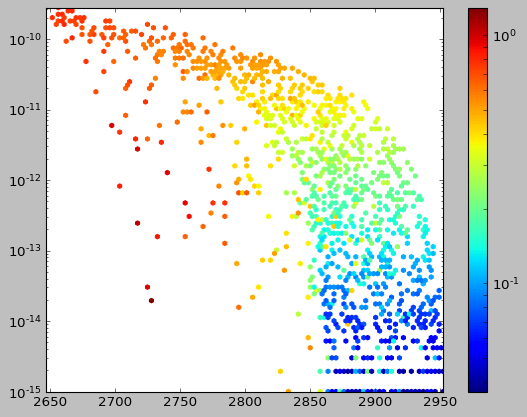

In [19]:
plt.hexbin(SPC.Fc1,SPC.DDn,np.sqrt(SPC.lamT1INPUT**2+SPC.lamT2INPUT**2),yscale='log',norm=LogNorm())
plt.colorbar()

In [23]:
SPCT=SPC[np.logical_or(SPC.lamT2INPUT/SPC.lamT1INPUT>5,SPC.lamT2INPUT/SPC.lamT1INPUT<0.2)]

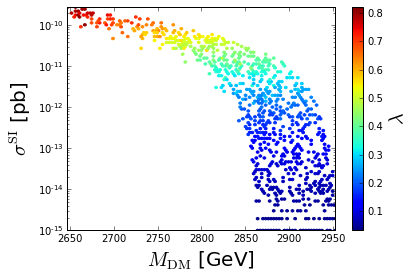

In [29]:
plt.hexbin(SPCT.Fc1,SPCT.DDn,np.sqrt(SPCT.lamT1INPUT**2+SPCT.lamT2INPUT**2),yscale='log')
cl=plt.colorbar()
cl.set_label(r'$\lambda$',size=20)
plt.xlabel(r'$M_{\rm DM}$ [GeV]', size=20)
plt.ylabel(r'$\sigma^{\rm SI}$ [pb]', size=20)
#plt.savefig('lambda.pdf')

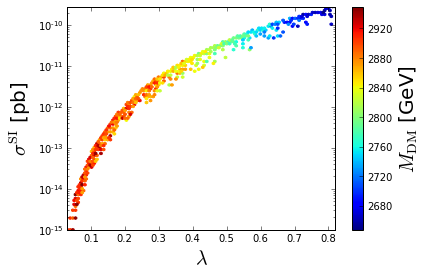

In [33]:
plt.hexbin(np.sqrt(SPCT.lamT1INPUT**2+SPCT.lamT2INPUT**2),SPCT.DDn,SPCT.Fc1,yscale='log')
cl=plt.colorbar()
cl.set_label(r'$M_{\rm DM}$ [GeV]',size=20)
plt.xlabel(r'$\lambda$', size=20)
plt.ylabel(r'$\sigma^{\rm SI}$ [pb]', size=20)
#plt.savefig('lambda.pdf')

In [34]:
SPC[SPC.lamT2INPUT<0].shape

(0, 178)

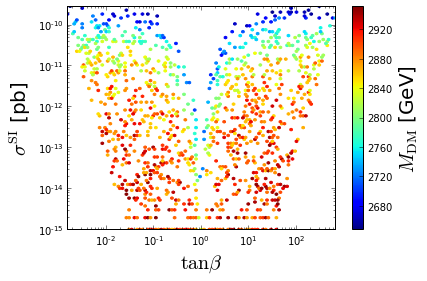

In [36]:
plt.hexbin(SPC.lamT2INPUT/SPC.lamT1INPUT,SPC.DDn,SPC.Fc1,yscale='log',xscale='log')
cl=plt.colorbar()
cl.set_label(r'$M_{\rm DM}$ [GeV]',size=20)
plt.xlabel(r'$\tan\beta$', size=20)
plt.ylabel(r'$\sigma^{\rm SI}$ [pb]', size=20)
#plt.savefig('lambda.pdf')

In [17]:
a.LHA_out_with_comments.blocks['DARKMATTER'].entries

_dict([(1, '0.110345        # relic density '),
       (100, '0.064875        # ~c01 ~c02 -> hh1 Zp'),
       (101, '0.056572        # ~c01 ~c02 -> hh2 Zp'),
       (102, '0.043474        # ~c01 ~c02 -> d1 D1'),
       (103, '0.043474        # ~c01 ~c02 -> d2 D2'),
       (104, '0.043474        # ~c01 ~c02 -> d3 D3'),
       (105, '0.028292        # ~cpp ~Cp1 -> D1 u1'),
       (106, '0.028292        # ~cpp ~Cp1 -> D2 u2'),
       (107, '0.028255        # ~cpp ~Cp1 -> D3 u3'),
       (108, '0.025527        # ~c01 ~c02 -> u1 U1'),
       (109, '0.025527        # ~c01 ~c02 -> u2 U2'),
       (110, '0.02544         # ~c01 ~c02 -> u3 U3'),
       (111, '0.023581        # ~cpp ~Cp1 -> Hmm WRm'),
       (112, '0.021887        # ~c01 ~c02 -> nu4 nu4'),
       (113, '0.021887        # ~c01 ~c02 -> nu5 nu5'),
       (114, '0.021887        # ~c01 ~c02 -> nu6 nu6'),
       (115, '0.019255        # ~cpp ~Cp1 -> A WRp'),
       (116, '0.015553        # ~c01 ~cp1 -> D1 u1'),
       (117, '0.015553  

In [93]:
spc.keys().values

array(['', 'Ah3', 'DDn', 'DDp', 'Fc1', 'Fc2', 'Fc3', 'Fcp1', 'Fcp2',
       'Fcpp', 'Fd1', 'Fd2', 'Fd3', 'Fe1', 'Fe2', 'Fe3', 'Fu1', 'Fu2',
       'Fu3', 'Fv1', 'Fv2', 'Fv3', 'Fv4', 'Fv5', 'Fv6', 'Hpm3', 'M1INPUT',
       'M23INPUT', 'TanBeta', 'UC11', 'UC12', 'UC13', 'UC21', 'UC22',
       'UC23', 'UC31', 'UC32', 'UC33', 'UP11', 'UP12', 'UP13', 'UP21',
       'UP22', 'UP23', 'UP31', 'UP32', 'UP33', 'VWLm', 'VWRm', 'VZ', 'VZR',
       'ZH11', 'ZH12', 'ZH13', 'ZH21', 'ZH22', 'ZH23', 'ZH31', 'ZH32',
       'ZH33', 'alp1INPUT', 'alp2INPUT', 'alp3INPUT', 'deltaRpp', 'hh1',
       'hh2', 'hh3', 'lam1INPUT', 'lam2INPUT', 'lam3INPUT', 'lam4INPUT',
       'lamT1INPUT', 'lamT2INPUT', 'relicdensity', 'rho1INPUT',
       'rho2INPUT', 'vRinput', '~c01~c02->d1D1', '~c01~c02->d2D2',
       '~c01~c02->d3D3', '~c01~c02->hh1Zp', '~c01~c02->hh2Zp',
       '~c01~c02->nu4nu4', '~c01~c02->nu5nu5', '~c01~c02->nu6nu6',
       '~c01~c02->u1U1', '~c01~c02->u2U2', '~c01~c02->u3U3',
       '~c01~cp1->D1u1', '~c0

In [61]:
pd.Series(a.LHA_out_with_comments.blocks['DMCHANNELS'].entries)

(9000012, 9000014, 25, 32)               0.064090
(9000012, 9000014, 35, 32)               0.055893
(9000012, 9000014, 1, 4294967295)        0.042799
(9000012, 9000014, 3, 4294967293)        0.042799
(9000012, 9000014, 5, 4294967291)        0.042799
(6000055, 4294967279, 4294967295, 2)     0.027748
(6000055, 4294967279, 4294967293, 4)     0.027748
(6000055, 4294967279, 4294967291, 6)     0.027712
(9000012, 9000014, 2, 4294967294)        0.025131
(9000012, 9000014, 4, 4294967292)        0.025131
(9000012, 9000014, 6, 4294967290)        0.025045
(6000055, 4294967279, 9000055, 34)       0.023087
(9000012, 9000014, 6000012, 6000012)     0.021547
(9000012, 9000014, 6000014, 6000014)     0.021547
(9000012, 9000014, 6000016, 6000016)     0.021547
(9000012, 17, 4294967295, 2)             0.021337
(9000012, 17, 4294967293, 4)             0.021337
(9000012, 17, 4294967291, 6)             0.021309
(6000055, 4294967279, 22, 4294967262)    0.019077
(9000012, 17, 9000055, 34)               0.017294


In [43]:
pd.Se

Series([], dtype: float64)

In [15]:
cat SPheno.spc.LRDMtmp

# SUSY Les Houches Accord 2 - MixedDMLR Spectrum + Decays + Flavor Observables
# SPheno module generated by SARAH
# ----------------------------------------------------------------------
# SPheno v3.3.8  
#   W. Porod, Comput. Phys. Commun. 153 (2003) 275-315, hep-ph/0301101
#   W. Porod, F.Staub, Comput.Phys.Commun.183 (2012) 2458-2469, arXiv:1104.1573
# SARAH: 4.9.1   
#   F. Staub; arXiv:0806.0538 (online manual)
#   F. Staub; Comput. Phys. Commun. 181 (2010) 1077-1086; arXiv:0909.2863
#   F. Staub; Comput. Phys. Commun. 182 (2011)  808-833; arXiv:1002.0840
#   F. Staub; Comput. Phys. Commun. 184 (2013)  1792-1809; arXiv:1207.0906
#   F. Staub; Comput. Phys. Commun. 185 (2014)  1773-1790; arXiv:1309.7223 
# Including the calculation of flavor observables based on the FlavorKit 
#   W. Porod, F. Staub, A. Vicente; Eur.Phys.J. C74 (2014) 8, 2992; arXiv:1405.1434 
# Two-loop masss corrections to Higgs fields based on 
#   M. D. Goodsell, K. Nickel, F. Staub; arXiv:1411.0675 
#   M. D. 

In [34]:
a.LHA_out_with_comments.blocks['DARKMATTER'].entries

_dict([(1, '0.119991        # relic density '),
       (100, '0.06409         # ~c01 ~c02 -> hh1 Zp'),
       (101, '0.055893        # ~c01 ~c02 -> hh2 Zp'),
       (102, '0.042799        # ~c01 ~c02 -> d1 D1'),
       (103, '0.042799        # ~c01 ~c02 -> d2 D2'),
       (104, '0.042799        # ~c01 ~c02 -> d3 D3'),
       (105, '0.027748        # ~cpp ~Cp1 -> D1 u1'),
       (106, '0.027748        # ~cpp ~Cp1 -> D2 u2'),
       (107, '0.027712        # ~cpp ~Cp1 -> D3 u3'),
       (108, '0.025131        # ~c01 ~c02 -> u1 U1'),
       (109, '0.025131        # ~c01 ~c02 -> u2 U2'),
       (110, '0.025045        # ~c01 ~c02 -> u3 U3'),
       (111, '0.023087        # ~cpp ~Cp1 -> Hmm WRm'),
       (112, '0.021547        # ~c01 ~c02 -> nu4 nu4'),
       (113, '0.021547        # ~c01 ~c02 -> nu5 nu5'),
       (114, '0.021547        # ~c01 ~c02 -> nu6 nu6'),
       (115, '0.021337        # ~c01 ~cp1 -> D1 u1'),
       (116, '0.021337        # ~c01 ~cp1 -> D2 u2'),
       (117, '0.021309  

In [25]:
cat SPheno.spc.LRDMtmp_nodecays.spc

# SUSY Les Houches Accord 2 - MixedDMLR Spectrum + Decays + Flavor Observables
# SPheno module generated by SARAH
# ----------------------------------------------------------------------
# SPheno v3.3.8  
#   W. Porod, Comput. Phys. Commun. 153 (2003) 275-315, hep-ph/0301101
#   W. Porod, F.Staub, Comput.Phys.Commun.183 (2012) 2458-2469, arXiv:1104.1573
# SARAH: 4.9.1   
#   F. Staub; arXiv:0806.0538 (online manual)
#   F. Staub; Comput. Phys. Commun. 181 (2010) 1077-1086; arXiv:0909.2863
#   F. Staub; Comput. Phys. Commun. 182 (2011)  808-833; arXiv:1002.0840
#   F. Staub; Comput. Phys. Commun. 184 (2013)  1792-1809; arXiv:1207.0906
#   F. Staub; Comput. Phys. Commun. 185 (2014)  1773-1790; arXiv:1309.7223 
# Including the calculation of flavor observables based on the FlavorKit 
#   W. Porod, F. Staub, A. Vicente; Eur.Phys.J. C74 (2014) 8, 2992; arXiv:1405.1434 
# Two-loop masss corrections to Higgs fields based on 
#   M. D. Goodsell, K. Nickel, F. Staub; arXiv:1411.0675 
#   M. D. 

# New plot

## Data anlysis

In [9]:
a.MODEL

'LRDM'

### FIx $\sigma^\hbox{SI}$

In [176]:
%%bash
cat SSP/SPheno.ssp.LRDM | perl -p -e 's/^(\s+201\s+[0-9\.eE\-\+]+\s+#)$/\1 DDn/' > kk 
cat kk | perl -p -e 's/^(\s+203\s+[0-9\.eE\-\+]+\s+#)$/\1 DDp/' > SSP/SPheno.ssp.LRDM 

#### Read specific input file:

In [10]:
sspff10TeV=['SSP/Exa5p.spc','SSP/Exa5Spec39.spc','SSP/Exa5Spec41.spc','SSP/Exa5Spec42a.spc',\
       'SSP/Exa5Spec42.spc']
sspff=['SSP/Exa5p2.spc','SSP/Run5p2.spc']
sspff=sspff10TeV
for ssp_file in sspff:
    a1=commands.getoutput(r"cat %s | perl -p -e 's/^(\s+201\s+[0-9\.eE\-\+]+\s+#)$/\1 DDn/' > kk" %ssp_file)
    a1=commands.getoutput(r"cat kk | perl -p -e 's/^(\s+203\s+[0-9\.eE\-\+]+\s+#)$/\1 DDp/' > %s" %ssp_file)

In [ ]:
SPC=pd.DataFrame()
for ssp_file in sspff: 
    #ssp_file='SSP/Exa5p.spc'
    f=open(ssp_file)
    spctxt=f.readlines()    

    i=0
    record=False
    start=time.time()
    spc=pd.DataFrame()    
    for l in spctxt:
        if not record:
            ff=open('SPheno.spc.%s' %a.MODEL,'w')

        k=re.match('^\s*endofparameterfile\s*$',l.lower())
        if k:
            record=False #Finalize record
            ff.close()
            #=======All the important code must be here=======
            i=i+1
            if i%100==0: print('.', end='')
            slha=a.readSSP()
            kk=a.branchings(a.LHA_out.decays,min_pdg=25)
            outs=pd.Series({})
            for key in ['MINPAR','MASS','CHMIX','SCALARMIX','AMIX']:
                outs=outs.append( block_to_series(a.LHA_out_with_comments.blocks[key]) )

            outs=outs.append(block_to_series(a.LHA_out_with_comments.blocks['DARKMATTER'],simplify_key=False))            
            outs=outs.append(pd.Series(a.LHA_out.blocks['DMCHANNELS'].entries))
            #outs=outs.append(a.Br_names)
            #outs=outs.append(pd.Series(a.LHA_out_with_comments.blocks['FWCOEF'].entries))
            spc=spc.append(outs,ignore_index=True) 
            #=================================
        else:
            ff.write(l)
            record=True

    print(time.time()-start)
    #if spc.M1INPUT.unique()[0]==50000:
    print(ssp_file,spc.M1INPUT.unique())
    SPC=SPC.append(spc).reset_index(drop=True)
    
SPC=SPC.fillna(0)    

...

In [439]:
SPC10=SPC.copy()

In [240]:
spc.M1INPUT.unique()[0]==50000

True

#### Read Full input file:

ssp_file='SPheno.ssp.%s' %a.MODEL
f=open(ssp_file)
spctxt=f.readlines()    

i=0
record=False
start=time.time()
spc=pd.DataFrame()    
for l in spctxt:
    if not record:
        ff=open('SPheno.spc.%s' %a.MODEL,'w')
            
    k=re.match('^\s*endofparameterfile\s*$',l.lower())
    if k:
        record=False #Finalize record
        ff.close()
        #=======All the important code must be here=======
        i=i+1
        if i%100==0: print('.', end='')
        slha=a.readSSP()
        kk=a.branchings(a.LHA_out.decays,min_pdg=25)
        outs=pd.Series({})
        for key in ['MINPAR','MASS','CHMIX','SCALARMIX','AMIX']:
            outs=outs.append( block_to_series(a.LHA_out_with_comments.blocks[key]) )

        outs=outs.append(block_to_series(a.LHA_out_with_comments.blocks['DARKMATTER'],simplify_key=False))            
        outs=outs.append(pd.Series(a.LHA_out.blocks['DMCHANNELS'].entries))
        #outs=outs.append(a.Br_names)
        #outs=outs.append(pd.Series(a.LHA_out_with_comments.blocks['FWCOEF'].entries))
        spc=spc.append(outs,ignore_index=True) 
        #=================================
    else:
        ff.write(l)
        record=True
        
print(time.time()-start)

spc.shape

spc.M1INPUT.unique()

spc=spc.fillna(0)

SPC=spc.copy()

#### Analysis

In [442]:
SAVE=False
if SAVE:
    SPC.to_excel('lrdmplot.xlsx',index=False)
else:
    #lrdm_xlsx=download_file_from_google_drive(drive['lrdm.xlsx'])
    SPC=pd.read_excel('lrdmplot.xlsx')
    SPC=SPC.fillna(0)

In [13]:
SPC.shape

(4166, 272)

In [14]:
mpl.style.use('classic')

In [15]:
#SPC[SPC.M1INPUT!=10000].M1INPUT.shape,SPC[SPC.M1INPUT!=50000].M1INPUT.shape

In [16]:
SPC[SPC.M1INPUT==50000].shape

(4166, 272)

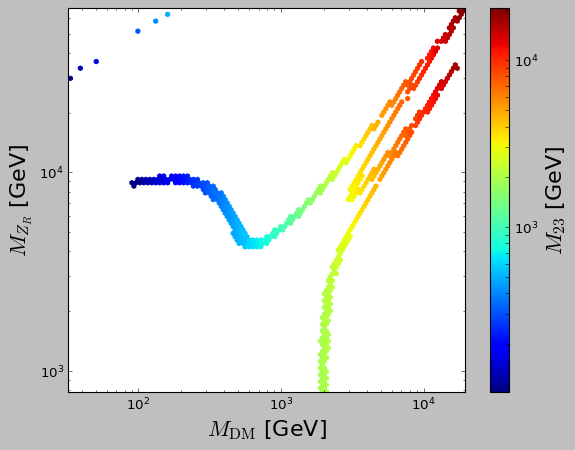

In [17]:
plt.hexbin(SPC.Fc1.abs(),SPC.VZR,SPC.M23INPUT,xscale='log',yscale='log',norm=LogNorm() )
cl=plt.colorbar()
cl.set_label(r'$M_{23}$ [GeV]',size=20)
plt.xlabel(r'$M_{\rm DM}$ [GeV]', size=20)
plt.ylabel(r'$M_{Z_R}$ [GeV]', size=20)
#plt.ylabel(r'$\sigma^{\rm SI}$ [pb]', size=20)
plt.savefig('fig1.png')

In [18]:
SPC[SPC.Fc2<0].shape

(4166, 272)

In [19]:
#SPC[SPC.Fc3.abs()>50200][['Fc1','Fc2','Fc3','VZR','M23INPUT','vRinput','M1INPUT']].sort_values('Fc3',ascending=False)

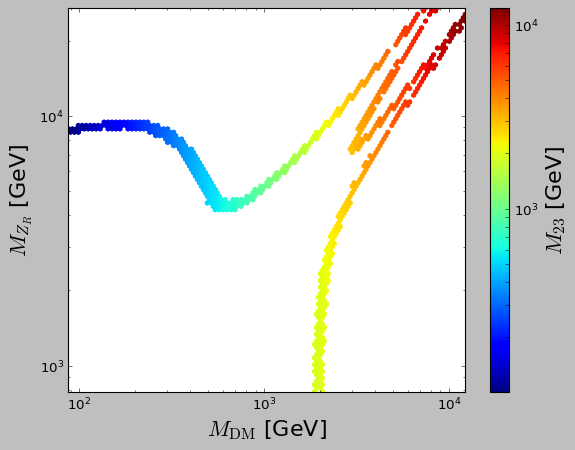

In [20]:
plt.hexbin(SPC[SPC.Fc3.abs()<50142].Fc1.abs(),SPC[SPC.Fc3.abs()<50142].VZR,SPC[SPC.Fc3.abs()<50142].M23INPUT,xscale='log',yscale='log',norm=LogNorm() )
cl=plt.colorbar()
cl.set_label(r'$M_{23}$ [GeV]',size=20)
plt.xlabel(r'$M_{\rm DM}$ [GeV]', size=20)
plt.ylabel(r'$M_{Z_R}$ [GeV]', size=20)
#plt.ylabel(r'$\sigma^{\rm SI}$ [pb]', size=20)
plt.savefig('fig1.png')

In [ ]:
SPCN=SPC[SPC.Fc3.abs()<50142].reset_index(drop=True)

In [21]:
print(SPC[np.logical_and(SPC.Fc1.abs()<900,SPC.VZR>2E4)].sort_values('Fc1')[['Fc1','Fc2','Fc3','VZR','M23INPUT','vRinput','M1INPUT','DDn','Fcp1','Fcp2','Fcpp']].reset_index(drop=True))

          Fc1         Fc2         Fc3         VZR    M23INPUT     vRinput  \
0 -158.639677 -493.786546  50652.4262  63554.6549  493.786546  80900.9417   
1 -130.329621 -407.231183  50537.5608  57673.0498  407.231183  73414.0318   
2  -99.945691 -314.748000  50414.6937  50639.7175  314.748000  64461.0446   
3  -50.388310 -163.138136  50213.5264  36319.4174  163.138136  46232.1999   
4  -39.368511 -135.696357  50175.0649  32882.5049  135.696357  41857.2226   
5  -32.245728 -111.316614  50143.5623  29775.2186  111.316614  37901.8374   

   M1INPUT           DDn        Fcp1        Fcp2        Fcpp  
0    50000  1.680000e-13  165.451956  50328.3346  493.786546  
1    50000  1.670000e-13  137.009721  50270.2215  407.231183  
2    50000  1.650000e-13  106.543030  50208.2050  314.748000  
3    50000  1.550000e-13   56.147176  50106.9910  163.138136  
4    50000  1.500000e-13   48.010806  50087.6856  135.696357  
5    50000  1.440000e-13   39.432459  50071.8842  111.316614  


In [40]:
SPCN[SPCN.Fc1.abs()<900].reset_index(drop=True).sort_values('Fc1').reset_index(drop=True).loc[[24]][[\
                'Fc1','Fc2','Fc3','VZR','M23INPUT','vRinput','M1INPUT','DDn','Fcp1','Fcp2','Fcpp']]

,Fc1,Fc2,Fc3,VZR,M23INPUT,vRinput,M1INPUT,DDn,Fcp1,Fcp2,Fcpp
24,94.018511,-106.425111,50012.4066,8742.27999,106.425111,11128.015,50000,1.000000e-15,100.22104,50006.2041,106.425111


In [140]:
SPC[SPC.M1INPUT==50000].shape#SPC.M1INPUT

(351, 291)

In [212]:
SPC=SPC[SPC.DDn>0]

In [213]:
SPC.shape

(3995, 273)

In [261]:
SPC[SPC.DDn!=0].shape

(171, 273)

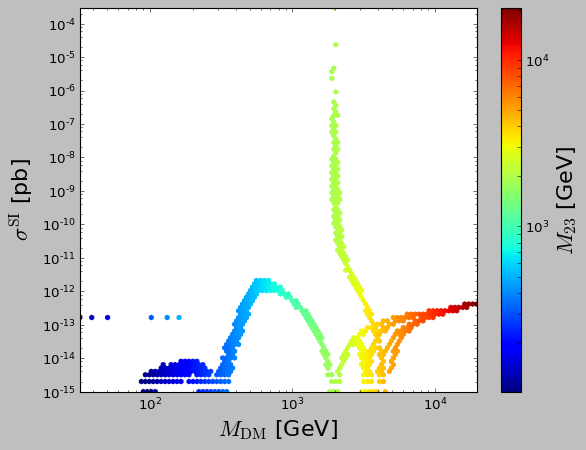

In [262]:
plt.hexbin(SPC[SPC.DDn!=0].Fc1.abs(),SPC[SPC.DDn!=0].DDn,SPC[SPC.DDn!=0].M23INPUT,xscale='log',yscale='log',norm=LogNorm() )
cl=plt.colorbar()
cl.set_label(r'$M_{23}$ [GeV]',size=20)
plt.xlabel(r'$M_{\rm DM}$ [GeV]', size=20)
plt.ylabel(r'$\sigma^{\rm SI}$ [pb]', size=20)
plt.savefig('fig2.png')

In [271]:
DD0=SPC[SPC.DDn==0].reset_index(drop=True)
DD0['DDn']=1E-16

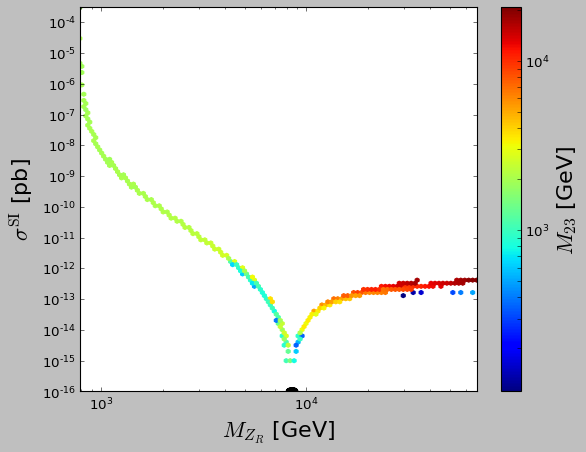

In [273]:
plt.hexbin(SPC[SPC.DDn!=0].VZR,SPC[SPC.DDn!=0].DDn,SPC[SPC.DDn!=0].M23INPUT,xscale='log',yscale='log',norm=LogNorm() )
plt.plot(DD0.VZR,DD0.DDn,'ko')
cl=plt.colorbar()
cl.set_label(r'$M_{23}$ [GeV]',size=20)
plt.xlabel(r'$M_{Z_R}$ [GeV]', size=20)
plt.ylabel(r'$\sigma^{\rm SI}$ [pb]', size=20)
plt.savefig('fig3.png')

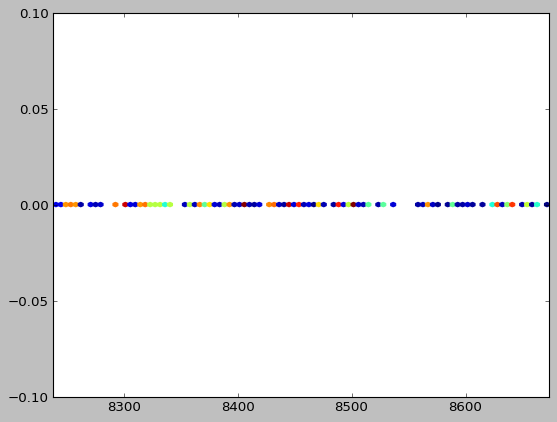

In [267]:
plt.hexbin(SPC[SPC.DDn==0].VZR,SPC[SPC.DDn==0].DDn,SPC[SPC.DDn==0].M23INPUT,xscale='lin',yscale='lin',norm=LogNorm() )

In [275]:
SPCf=SPC[SPC.M1INPUT==50000].reset_index(drop=True)

In [276]:
SPCf[['M23INPUT']].min(),SPCf[['M23INPUT']].max(),SPCf[['M1INPUT']].min(),SPCf[['M1INPUT']].max(),\
SPCf[['vRinput']].min(),SPCf[['vRinput']].max(),SPCf[['lamT1INPUT']].min(),SPCf[['lamT1INPUT']].max(),\
SPCf[['lamT2INPUT']].min(),SPCf[['lamT2INPUT']].max()

(M23INPUT    100.103777
 dtype: float64, M23INPUT    20829.9099
 dtype: float64, M1INPUT    50000.0
 dtype: float64, M1INPUT    50000.0
 dtype: float64, vRinput    997.708688
 dtype: float64, vRinput    85930.5003
 dtype: float64, lamT1INPUT    0.1
 dtype: float64, lamT1INPUT    0.1
 dtype: float64, lamT2INPUT   -0.1
 dtype: float64, lamT2INPUT   -0.1
 dtype: float64)

## Final plots

In [446]:
SPC.shape

(4166, 272)

In [33]:
from multicurvefit import *
ff=multicurvefit()
ff.read_json('lux2016.json')

In [448]:
ff(SPCF.abs().sort_values('Fc1').Fc1)

array([  2.40830963e-10,   2.41949083e-10,   2.42414181e-10, ...,
         3.24270728e-08,   3.26095075e-08,   3.28607646e-08])

In [451]:
SPCF=SPC[np.logical_and(SPC.Fc1>0,SPC.vRinput<50001)].reset_index(drop=True)
SPCF['LUX']=SPCF.Fc1.abs().map(ff)

In [407]:
SPCF[SPCF.DDn>SPCF.LUX].shape

(77, 274)

In [485]:
fs=25; fst=15

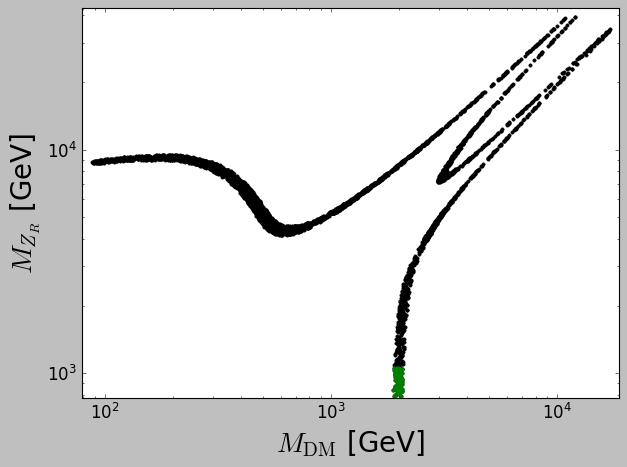

In [486]:
plt.loglog(SPCF.Fc1.abs(),SPCF.VZR,'k.')
plt.loglog(SPCF[SPCF.DDn>SPCF.LUX].Fc1.abs(),SPCF[SPCF.DDn>SPCF.LUX].VZR,'g.')
plt.xlabel(r'$M_{\rm DM}$ [GeV]', size=fs)
plt.ylabel(r'$M_{Z_R}$ [GeV]', size=fs)
plt.xlim(SPCF.abs().Fc1.min()*0.9,SPCF.abs().Fc1.max()*1.1)
plt.ylim(SPCF.VZR.min()*0.98,SPCF.VZR.max()*1.1)
plt.xticks(fontsize = fst)
plt.yticks(fontsize = fst)
plt.tight_layout()
#plt.ylabel(r'$\sigma^{\rm SI}$ [pb]', size=20)
plt.savefig('fig1.pdf')

In [475]:
SPCD=SPCF[SPCF.DDn>0]

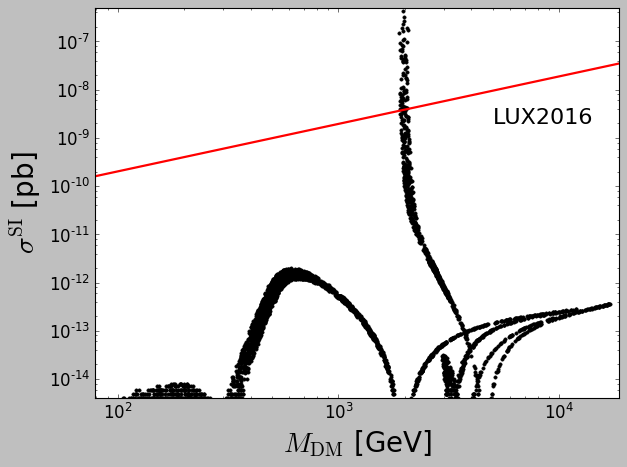

In [494]:
plt.loglog(SPCD.Fc1.abs(),SPCD.DDn,'k.')
plt.plot([SPCF.Fc1.abs().min()*0.9,SPCF.Fc1.abs().max()*1.1],[1.6E-10,3.5E-8],'r-',lw=2)
plt.xlabel(r'$M_{\rm DM}$ [GeV]', size=fs)
plt.ylabel(r'$\sigma^{\rm SI}$ [pb]', size=fs)
plt.xlim(SPCF.abs().Fc1.min()*0.9,SPCF.abs().Fc1.max()*1.1)
plt.ylim(4E-15,5E-7)
plt.text(5E3,2E-9,'LUX2016',size=20)
plt.xticks(fontsize = fst)
plt.yticks(fontsize = fst)
plt.tight_layout()
plt.savefig('fig2.pdf')

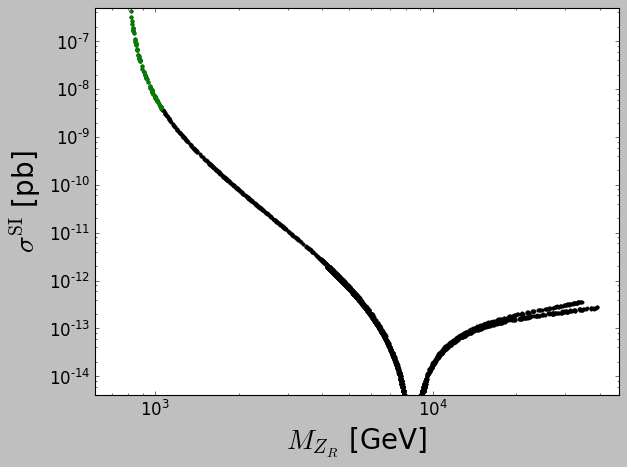

In [496]:
plt.loglog(SPCD.VZR,SPCD.DDn,'k.')
plt.loglog(SPCF[SPCF.DDn>SPCF.LUX].VZR,SPCF[SPCF.DDn>SPCF.LUX].DDn,'g.')
plt.xlabel(r'$M_{Z_R}$ [GeV]', size=fs)
plt.ylabel(r'$\sigma^{\rm SI}$ [pb]', size=fs)
plt.xlim(SPCF.VZR.min()*0.77,SPCF.VZR.max()*1.2)
#plt.ylim(SPCF.DDn.min()*0.01,3E-7)
plt.ylim(4E-15,5E-7)
plt.xticks(fontsize = fst)
plt.yticks(fontsize = fst)
#plt.ylim(SPCF.VZR.min()*0.8,SPCF.VZR.max()*1.1)
#plt.ylabel(r'$\sigma^{\rm SI}$ [pb]', size=20)
plt.tight_layout()
plt.savefig('fig3.pdf')

## 10 TeV red and 50 TeV black 

In [444]:
SPC10[SPC10.M1INPUT==10000].shape

(1390, 271)

In [454]:
SPC10['LUX']=SPC10.Fc1.abs().map(ff)

In [460]:
SPC10=SPC10[SPC10.DDn!=0]

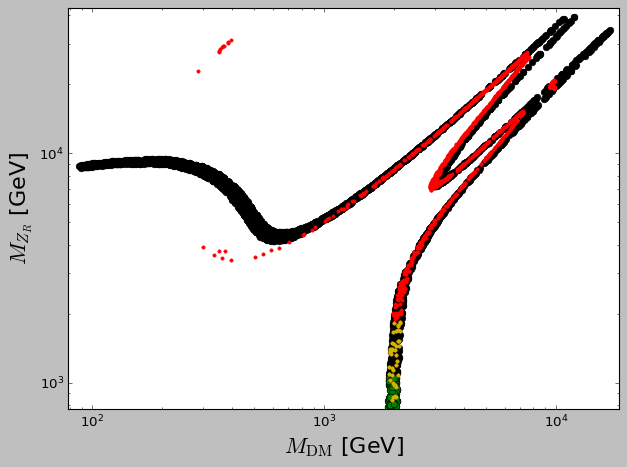

In [461]:
plt.loglog(SPCF.Fc1.abs(),SPCF.VZR,'ko')
plt.loglog(SPCF[SPCF.DDn>SPCF.LUX].Fc1.abs(),SPCF[SPCF.DDn>SPCF.LUX].VZR,'go')
plt.loglog(SPC10.Fc1.abs(),SPC10.VZR,'r.')
plt.loglog(SPC10[SPC10.DDn>SPC10.LUX].Fc1.abs(),SPC10[SPC10.DDn>SPC10.LUX].VZR,'y.')
plt.xlabel(r'$M_{\rm DM}$ [GeV]', size=20)
plt.ylabel(r'$M_{Z_R}$ [GeV]', size=20)
plt.xlim(SPCF.abs().Fc1.min()*0.9,SPCF.abs().Fc1.max()*1.1)
plt.ylim(SPCF.VZR.min()*0.98,SPCF.VZR.max()*1.1)
plt.tight_layout()
#plt.ylabel(r'$\sigma^{\rm SI}$ [pb]', size=20)
plt.savefig('fig1.pdf')

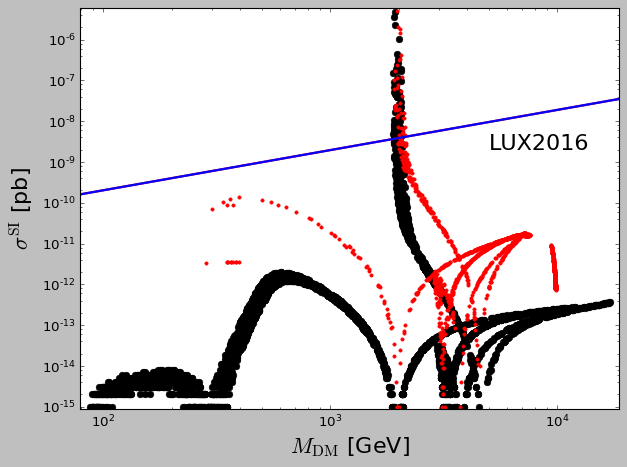

In [472]:
plt.loglog(SPCD.Fc1.abs(),SPCD.DDn,'ko')
plt.plot([SPCF.Fc1.abs().min()*0.9,SPCF.Fc1.abs().max()*1.1],[1.6E-10,3.5E-8],'r-',lw=2)
plt.loglog(SPC10.Fc1.abs(),SPC10.DDn,'r.')
plt.plot([SPCF.Fc1.abs().min()*0.9,SPCF.Fc1.abs().max()*1.1],[1.6E-10,3.5E-8],'b-',lw=2)
plt.xlabel(r'$M_{\rm DM}$ [GeV]', size=20)
plt.ylabel(r'$\sigma^{\rm SI}$ [pb]', size=20)
plt.xlim(SPCF.abs().Fc1.min()*0.9,SPCF.abs().Fc1.max()*1.1)
plt.ylim(9E-16,6E-6)
#plt.ylim(3E-9,5E-9)
plt.text(5E3,2E-9,'LUX2016',size=20)
#plt.ylim(SPCF.VZR.min()*0.8,SPCF.VZR.max()*1.1)
#plt.ylabel(r'$\sigma^{\rm SI}$ [pb]', size=20)
plt.tight_layout()
plt.savefig('fig2.pdf')

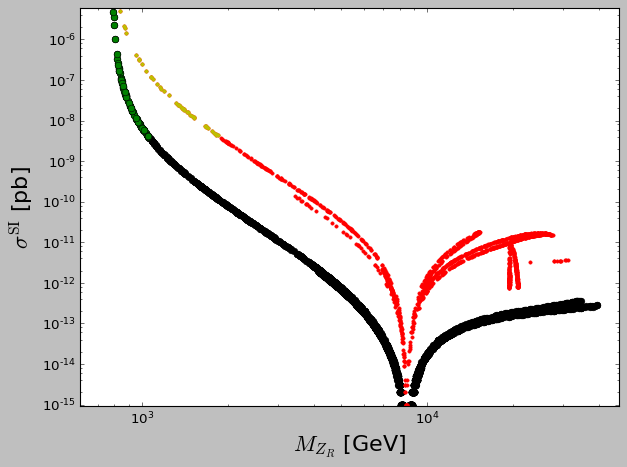

In [473]:
plt.loglog(SPCD.VZR,SPCD.DDn,'ko')
plt.loglog(SPCF[SPCF.DDn>SPCF.LUX].VZR,SPCF[SPCF.DDn>SPCF.LUX].DDn,'go')
plt.loglog(SPC10.VZR,SPC10.DDn,'r.')
plt.loglog(SPC10[SPC10.DDn>SPC10.LUX].VZR,SPC10[SPC10.DDn>SPC10.LUX].DDn,'y.')

plt.xlabel(r'$M_{Z_R}$ [GeV]', size=20)
plt.ylabel(r'$\sigma^{\rm SI}$ [pb]', size=20)
plt.xlim(SPCF.VZR.min()*0.77,SPCF.VZR.max()*1.2)
#plt.ylim(SPCF.DDn.min()*0.01,3E-7)
plt.ylim(9E-16,6E-6)
#plt.ylim(SPCF.VZR.min()*0.8,SPCF.VZR.max()*1.1)
#plt.ylabel(r'$\sigma^{\rm SI}$ [pb]', size=20)
plt.tight_layout()
plt.savefig('fig3.pdf')

## Further checks

In [508]:
SPCD=SPC[SPC.DDn>0].reset_index(drop=True)
SPCD=SPCD[SPCD.Fc1>0].reset_index(drop=True)

In [518]:
SPCD['DeltaM']=

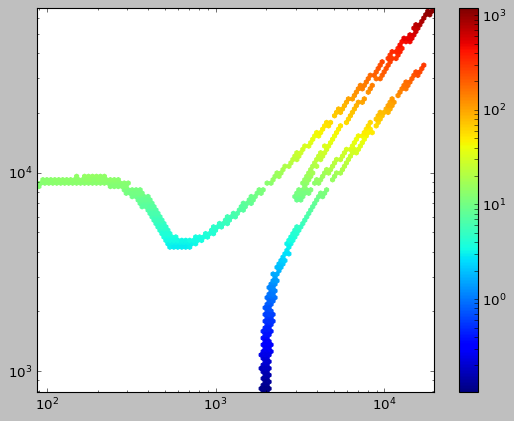

In [529]:
plt.hexbin(SPCD.Fc1.abs(),SPCD.VZR,SPCD.Fc3-SPCD.M1INPUT,xscale='log',yscale='log',norm=LogNorm() )
plt.colorbar()

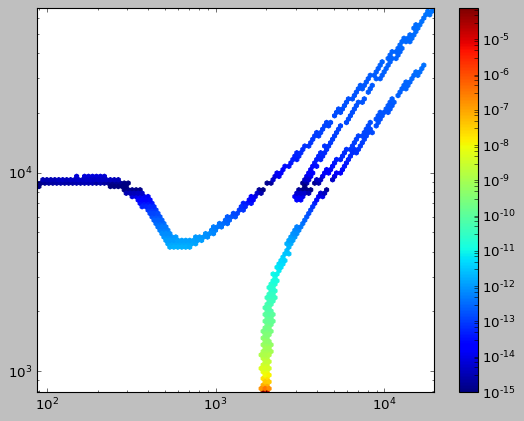

In [523]:
plt.hexbin(SPCD.Fc1.abs(),SPCD.VZR,SPCD.DDn,xscale='log',yscale='log',norm=LogNorm() )
plt.colorbar()

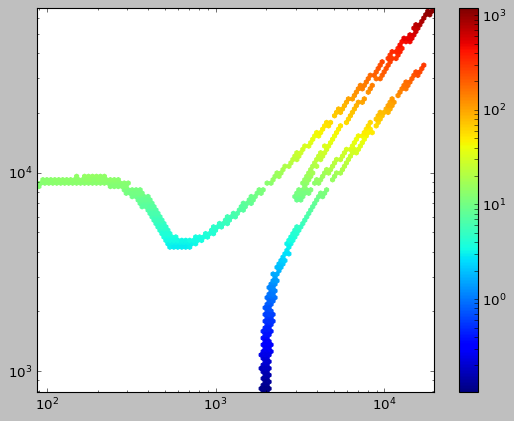

In [522]:
plt.hexbin(SPCD.Fc1.abs(),SPCD.VZR,(SPCD.M23INPUT-SPCD.Fc1.abs()),xscale='log',yscale='log',norm=LogNorm() )
plt.colorbar()

In [513]:
SPCD[SPCD.Fc1.abs()<200][['Fc1','Fc2','Fc3','VZR','M23INPUT','vRinput','M1INPUT','DDn','Fcp1','Fcp2','Fcpp']].reset_index(drop=True)

,Fc1,Fc2,Fc3,VZR,M23INPUT,vRinput,M1INPUT,DDn,Fcp1,Fcp2,Fcpp
0,131.655666,-144.997741,50013.3421,9062.44176,144.997741,11535.5726,50000,3.000000e-15,138.325811,50006.6719,144.997741
1,175.110361,-189.262090,50014.1517,9329.28348,189.262090,11875.2545,50000,6.000000e-15,182.185221,50007.0769,189.262090
2,150.144951,-163.811828,50013.6669,9170.38077,163.811828,11672.9759,50000,4.000000e-15,156.977452,50006.8344,163.811828
3,133.368950,-147.225511,50013.8566,9235.34986,147.225511,11755.6797,50000,5.000000e-15,140.296268,50006.9292,147.225511
4,96.104693,-108.899538,50012.7948,8877.82021,108.899538,11300.5543,50000,2.000000e-15,102.501295,50006.3982,108.899538
5,149.761591,-163.090071,50013.3285,9056.17967,163.090071,11527.6011,50000,3.000000e-15,156.424940,50006.6651,163.090071
6,155.110937,-169.051529,50013.9406,9261.28949,169.051529,11788.7001,50000,5.000000e-15,162.080259,50006.9713,169.051529
7,112.348494,-125.892509,50013.5440,9132.53036,125.892509,11624.7934,50000,4.000000e-15,119.119582,50006.7729,125.892509
8,164.294783,-178.240740,50013.9460,9262.21777,178.240740,11789.8818,50000,5.000000e-15,171.266786,50006.9740,178.240740
9,94.506150,-106.992074,50012.4859,8770.13826,106.992074,11163.4779,50000,1.000000e-15,100.748331,50006.2437,106.992074


In [514]:
SPCD[SPCD.DDn>1E-10][['Fc1','Fc2','Fc3','VZR','M23INPUT','vRinput','M1INPUT','DDn','Fcp1','Fcp2','Fcpp']].reset_index(drop=True)

,Fc1,Fc2,Fc3,VZR,M23INPUT,vRinput,M1INPUT,DDn,Fcp1,Fcp2,Fcpp
0,1986.99043,-1987.51343,50000.5230,1761.861730,1987.51343,2241.01832,50000,1.481620e-10,1987.25193,50000.2615,1987.51343
1,2051.16320,-2051.61013,50000.4469,1627.822990,2051.61013,2070.25312,50000,2.253790e-10,2051.38667,50000.2235,2051.61013
2,2126.36766,-2126.92420,50000.5565,1814.745390,2126.92420,2308.38620,50000,1.279990e-10,2126.64593,50000.2783,2126.92420
3,2144.21263,-2144.76754,50000.5549,1811.772630,2144.76754,2304.59931,50000,1.291750e-10,2144.49008,50000.2775,2144.76754
4,2042.10163,-2042.58640,50000.4848,1695.366780,2042.58640,2156.30667,50000,1.815170e-10,2042.34401,50000.2424,2042.58640
5,2090.42659,-2090.96725,50000.5407,1789.379230,2090.96725,2276.07291,50000,1.373750e-10,2090.69692,50000.2703,2090.96725
6,2075.38860,-2075.97750,50000.5889,1867.678870,2075.97750,2375.81466,50000,1.103340e-10,2075.68305,50000.2944,2075.97750
7,2068.98479,-2069.53265,50000.5479,1801.647230,2069.53265,2291.70088,50000,1.325170e-10,2069.25872,50000.2739,2069.53265
8,2003.72115,-2004.22275,50000.5016,1725.194620,2004.22275,2194.30669,50000,1.653920e-10,2003.97195,50000.2508,2004.22275
9,2088.24070,-2088.77924,50000.5385,1785.909400,2088.77924,2271.65274,50000,1.387410e-10,2088.50997,50000.2693,2088.77924


In [37]:
x=np.linspace(50,500,200)

(9e-14, 2e-08)

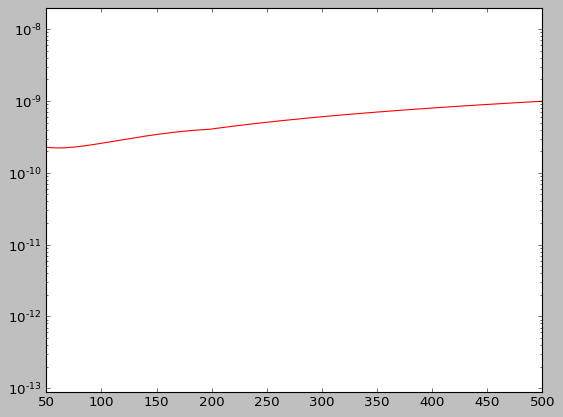

In [39]:
plt.semilogy(x,ff(x),'r-')
plt.xlim(50,500)
plt.ylim(9E-14,2E-8)

# Old

In [16]:
import pandas as pd
import re

def ssp_parser(ssp_file):
    '''
    Convert a Web of Science text file into a pandas DataFrame.
    The text file is generated by following the instructions in:
    
    http://diging.github.io/tethne/getting_data.html
    '''



In [17]:
ssp_parser(wos_file)

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE



1

In [10]:
%%bash
grep ssp_parser *

SSP_file_reader.ipynb:    "def ssp_parser(ssp_file):\n",
SSP_file_reader.ipynb:    "ssp_parser(wos_file)"
SSP_file_reader.ipynb:      "\u001b  File \u001b\"<ipython-input-9-9f6ad4592743>\"\u001b, line \u001b1\u001b\n\u001b    grep ssp_parser *\u001b\n\u001b                  ^\u001b\n\u001bSyntaxError\u001b\u001b:\u001b invalid syntax\n"
SSP_file_reader.ipynb:    "grep ssp_parser *"


grep: InclusiveTTbar1J: Is a directory
grep: io: Is a directory
grep: MadOut: Is a directory
grep: PROC_ZpBminusLSM_0: Is a directory
grep: PROC_ZpBminusLSM_1: Is a directory
grep: PROC_ZpBminusLSM_2: Is a directory
grep: SSP: Is a directory
grep: VBF: Is a directory
